## Exemplo

In [2]:

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn import cluster


In [3]:

# Import image
image = plt.imread('./imgs/flor.jpg')

In [4]:

# Definindo algumas funções

def print_image(image):
    plt.axis('off')
    plt.imshow(image)
    

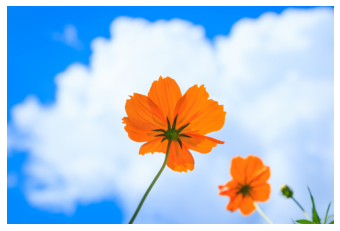

In [5]:

# print image
print_image(image)

In [6]:
image.shape

(836, 1254, 3)

In [7]:
print(image)

[[[  0 131 250]
  [  0 132 251]
  [  0 133 252]
  ...
  [  0 120 233]
  [  0 118 234]
  [  0 118 234]]

 [[  0 133 252]
  [  0 133 252]
  [  0 133 251]
  ...
  [  0 122 233]
  [  1 120 238]
  [  0 119 237]]

 [[  1 134 253]
  [  0 133 252]
  [  0 133 251]
  ...
  [  0 124 232]
  [  0 123 236]
  [  3 119 238]]

 ...

 [[  0 137 253]
  [  1 138 254]
  [  0 137 253]
  ...
  [ 79 132   0]
  [ 79 135   0]
  [ 79 135   0]]

 [[  0 137 253]
  [  1 138 254]
  [  0 137 253]
  ...
  [ 82 136   0]
  [ 84 138   1]
  [ 84 138   1]]

 [[  1 138 254]
  [  1 138 254]
  [  1 138 254]
  ...
  [ 85 137   0]
  [ 86 140   2]
  [ 86 140   2]]]


In [12]:
image_vet = np.reshape(image, (836*1254, 3))

In [13]:
pixel_df = pd.DataFrame(image_vet, columns=['Red','Green','Blue']); pixel_df

,Red,Green,Blue
0,0,131,250
1,0,132,251
2,0,133,252
3,0,133,251
4,0,132,250
...,...,...,...
1048339,83,136,2
1048340,85,137,1
1048341,85,137,0
1048342,86,140,2


In [9]:
pixel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048344 entries, 0 to 1048343
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype
---  ------  --------------    -----
 0   Red     1048344 non-null  uint8
 1   Green   1048344 non-null  uint8
 2   Blue    1048344 non-null  uint8
dtypes: uint8(3)
memory usage: 3.0 MB


In [10]:
pixel_df.describe()

,Red,Green,Blue
count,1.048344e+06,1.048344e+06,1.048344e+06
mean,1.700071e+02,1.963667e+02,2.239838e+02
std,8.625558e+01,4.985664e+01,7.813628e+01
min,0.000000e+00,3.800000e+01,0.000000e+00
25%,1.460000e+02,1.430000e+02,2.530000e+02
50%,2.070000e+02,2.180000e+02,2.540000e+02
75%,2.300000e+02,2.400000e+02,2.550000e+02
max,2.550000e+02,2.550000e+02,2.550000e+02


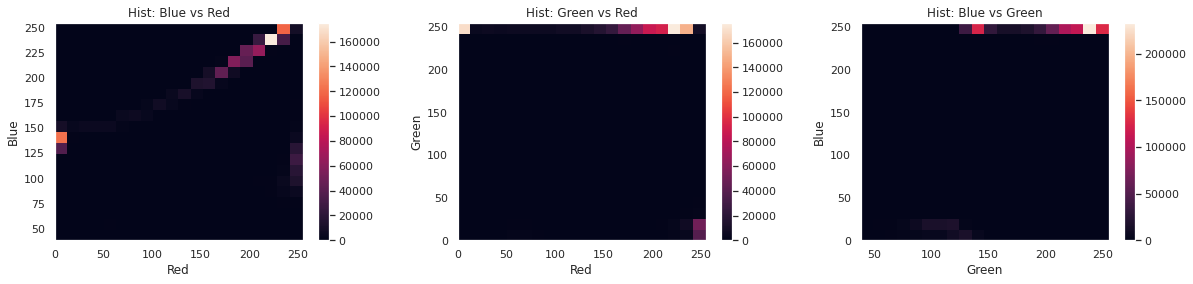

In [38]:

fig, (axe1, axe2, axe3) = plt.subplots(1,3 , figsize=(20,4))
fig.subplots_adjust(wspace=0.3)

h1 = axe1.hist2d(image_vet[:,0], image_vet[:,1], bins=(20,20))
fig.colorbar(h1[3],ax=axe1)
axe1.set_title('Hist: Blue vs Red')
axe1.set_ylabel('Blue')
axe1.set_xlabel('Red')


h2 = axe2.hist2d(image_vet[:,0], image_vet[:,2], bins=(20,20))
fig.colorbar(h2[3], ax=axe2)
axe2.set_title('Hist: Green vs Red')
axe2.set_ylabel('Green')
axe2.set_xlabel('Red')

h3 = axe3.hist2d(image_vet[:,1], image_vet[:,2], bins=(20,20))
fig.colorbar(h3[3], ax=axe3)
axe3.set_title('Hist: Blue vs Green')
axe3.set_ylabel('Blue')
axe3.set_xlabel('Green')

plt.show()

In [97]:

model_kmeans = cluster.KMeans(3)
clustered = model_kmeans.fit_predict(image_vet)


In [98]:
pd.value_counts(clustered)

0    699447
1    220005
2    128892
dtype: int64

In [99]:
clustered_image = np.reshape(clustered, (836, 1254))

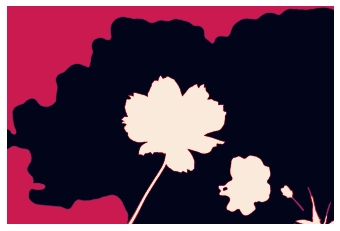

In [100]:

plt.imshow(clustered_image)
plt.axis('off')
plt.show()

In [101]:

model_kmeans.predict(np.array([0, 0, 255]).reshape(1,3))

array([1], dtype=int32)

In [102]:

image_2 = plt.imread('./imgs/flor2.jpeg')

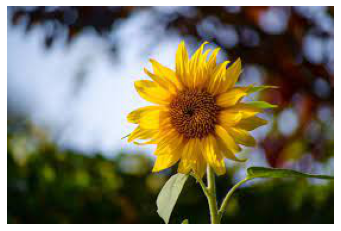

In [85]:
print_image(image_2)

In [86]:
image_2.shape

(183, 275, 3)

In [103]:

image2_vet = np.reshape(image_2, (183*275,3))

In [91]:
model_kmeans.fit(image2_vet)

KMeans(n_clusters=3)

In [104]:
cruster2 = model_kmeans.predict(image2_vet)

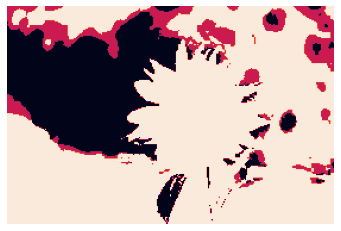

In [106]:
plt.imshow(np.reshape(cruster2, (183,275)))
plt.axis('off')
plt.show()

In [107]:
cruster_test = model_kmeans.predict(image_vet)

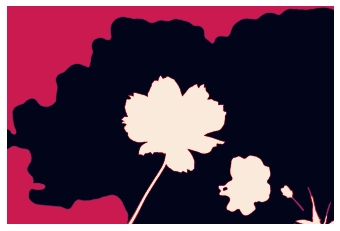

In [108]:
plt.imshow(np.reshape(cruster_test, (836, 1254)))
plt.axis('off')
plt.show()